# PART B: UNSUPERVISED LEARNING 

## TASK: 
### To understand your employees so that appropriate direction can be given to the management to satisfy and retain the employees.

Data Fields
- Age: Employee age
- Gender: Employee gender
- BusinessTravel: Business travel frequency for the employee
- Job Function: Department of the employee
- Distance Between Company and Home (KM): distance between company and home
- Education (1 is lowest, 5 is highest): Education qualification of employee
- Job Satisfaction (1 is lowest, 4 is highest): Employee's job satisfaction
- MaritalStatus: Marital status of employee
- Salary ($): Employee's salary
- Performance Rating (1 is lowest, 4 is highest): Employee's performance rating in the company
- Work Life Balance (1 is worst, 4 is best): Work life balance rating
- Length of Service (Years): How many years the employee works for the company
- Resign Status: Is the employee still with the company


### Background Information
Employees may choose to stay or leave a company based one many reasons. On some research I have done, employees tend to look at the Salary, Work Life Balance, working condition and company mission and vision.

Documentation: https://mobilemonkey.com/articles/reasons-why-employees-stay

## Import Libraries

In [437]:
import matplotlib.pyplot as plt
import os
%pylab inline
from pylab import rcParams

rcParams['figure.figsize'] = 22,10
from sklearn.preprocessing import LabelEncoder
import datetime
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

Populating the interactive namespace from numpy and matplotlib


In [521]:
df = pd.read_csv("Company_Employee.csv")
df

,Age,Gender,BusinessTravel,Job Function,Distance Between Company and Home (KM),"Education (1 is lowest, 5 is highest)","Job Satisfaction (1 is lowest, 4 is highest)",MaritalStatus,Salary ($),"Performance Rating (1 is lowest, 4 is highest)","Work Life Balance (1 is worst, 4 is best)",Length of Service (Years),Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


In [522]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Age                                             1470 non-null   int64 
 1   Gender                                          1470 non-null   object
 2   BusinessTravel                                  1470 non-null   object
 3   Job Function                                    1470 non-null   object
 4   Distance Between Company and Home (KM)          1470 non-null   int64 
 5   Education (1 is lowest, 5 is highest)           1470 non-null   int64 
 6   Job Satisfaction (1 is lowest, 4 is highest)    1470 non-null   int64 
 7   MaritalStatus                                   1470 non-null   object
 8   Salary ($)                                      1470 non-null   int64 
 9   Performance Rating (1 is lowest, 4 is highest)  1470

No Null Values

In [439]:
df.rename(columns = {'Distance Between Company and Home (KM)':'Distance', 
                     'Education (1 is lowest, 5 is highest)':'Education',
                     'Job Satisfaction (1 is lowest, 4 is highest)':'Job Satisfaction',
                     'Salary ($)':'Salary',
                     'Performance Rating (1 is lowest, 4 is highest)':'Performance Rating',
                     'Work Life Balance (1 is worst, 4 is best)':'Work Life Balance',
                     'Length of Service (Years)':'Service Length'}, inplace = True)
df

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status
0,41,Female,Travel_Rarely,Sales,1,2,4,Single,5993,3,1,6,Yes
1,49,Male,Travel_Frequently,Research & Development,8,1,2,Married,5130,4,3,10,No
2,37,Male,Travel_Rarely,Research & Development,2,2,3,Single,2090,3,3,0,Yes
3,33,Female,Travel_Frequently,Research & Development,3,4,3,Married,2909,3,3,8,No
4,27,Male,Travel_Rarely,Research & Development,2,1,2,Married,3468,3,3,2,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Male,Travel_Frequently,Research & Development,23,2,4,Married,2571,3,3,5,No
1466,39,Male,Travel_Rarely,Research & Development,6,1,1,Married,9991,3,3,7,No
1467,27,Male,Travel_Rarely,Research & Development,4,3,2,Married,6142,4,3,6,No
1468,49,Male,Travel_Frequently,Sales,2,3,2,Married,5390,3,2,9,No


### EDA: Exploratory Data Analysis

I then visualized the dataset to get a clearer idea on the dataset:

 - Countplot to show the count Gender, BusinessTravel, Job Function, Education, Job Satisfaction, MaritalStatus,	Performance, Rating	Work, Life Balance and Resign Status columns
 - Boxplot to find any outliers of the numerical columns
 - Histogram to show to show frequency distributions of each feature
 - Pairplot to indentify any correlations between features

#### Categorial data

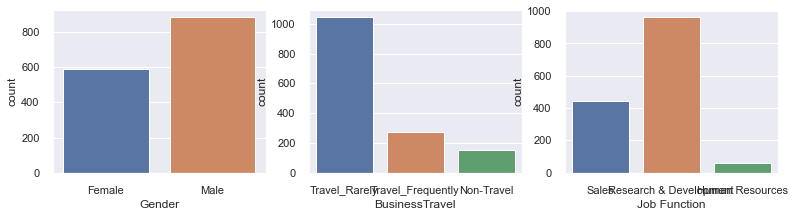

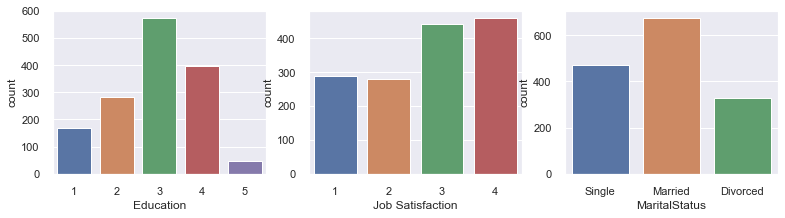

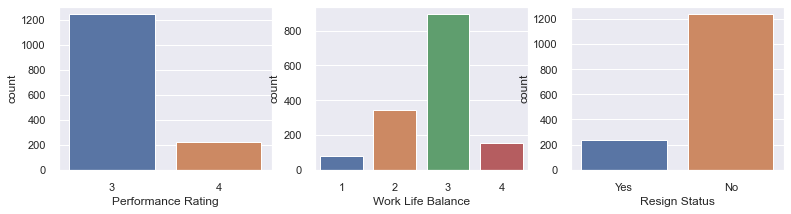

In [443]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(13, 3))

sns.countplot(x=df['Gender'], ax=axs[0])
sns.countplot(x=df['BusinessTravel'], ax=axs[1])
sns.countplot(x=df['Job Function'], ax=axs[2])

fig, axs = plt.subplots(1, 3, figsize=(13, 3))
sns.countplot(x=df['Education'], ax=axs[0])
sns.countplot(x=df['Job Satisfaction'], ax=axs[1])
sns.countplot(x=df['MaritalStatus'], ax=axs[2])

fig, axs = plt.subplots(1, 3, figsize=(13, 3))
sns.countplot(x=df['Performance Rating'], ax=axs[0])
sns.countplot(x=df['Work Life Balance'], ax=axs[1])
sns.countplot(x=df['Resign Status'], ax=axs[2])
plt.show()

### Check outlier

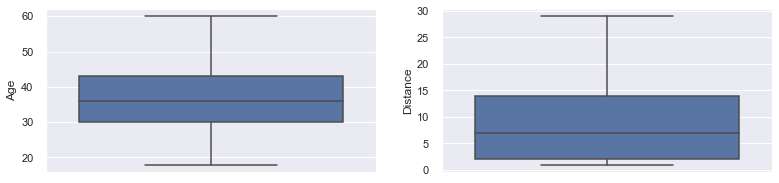

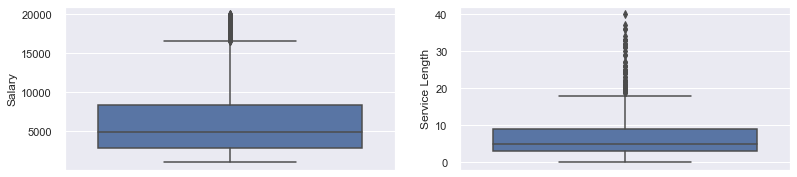

In [440]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))

sns.boxplot(data=df, y="Age", ax=axs[0])
sns.boxplot(data=df, y="Distance", ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
sns.boxplot(data=df, y="Salary", ax=axs[0])
sns.boxplot(data=df, y="Service Length", ax=axs[1])

plt.show()

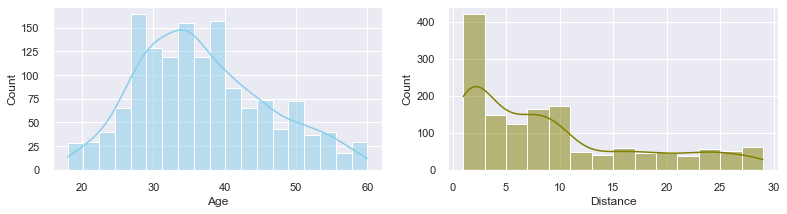

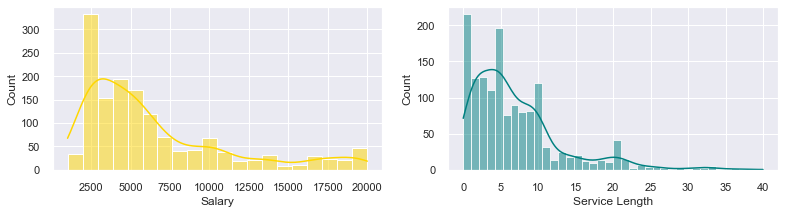

In [441]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(data=df, x="Age", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=df, x="Distance", kde=True, color="olive", ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
sns.histplot(data=df, x="Salary", kde=True, color="gold", ax=axs[0])
sns.histplot(data=df, x="Service Length", kde=True, color="teal", ax=axs[1])

plt.show()

#### Conclusion - There are employee of wide variety of ages

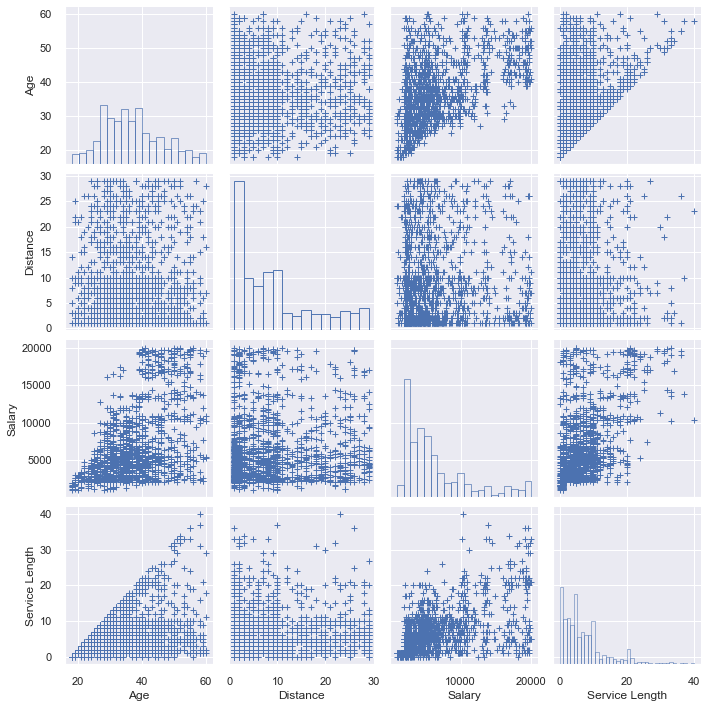

In [518]:
sns.set_style("darkgrid")
edited_df=df[['Age','Distance','Salary','Service Length']]
sns.pairplot(
    edited_df,
    plot_kws=dict(marker="+", linewidth=1),
    diag_kws=dict(fill=False),
)

In [442]:
# df['Age'] = pd.cut(df['Age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
#                               labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
# df['Salary'] = pd.cut(df['Salary'], [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000, 13000, 14000, 15000, 16000, 17000, 18000, 19000, 200000], 
#                               labels=['1000-2000', '2000-3000', '3000-4000','4000-5000', '5000-6000','6000-7000','7000-8000', '8000-9000','9000-10000','10000-11000', '11000-12000', '12000-13000', '13000-14000','14000-15000', '15000-16000','16000-17000','17000-18000', '18000-19000','19000-20000'])
# df

### Data is clean.

## Data Proprocessing

I convert the categorial data columns: 'Gender', 'BusinessTravel', 'Job Function', 'MaritalStatus', 'Resign Status' into numerical data by using LabelEncoder

In [449]:
#LabelEncoder to convert categorial data
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder

df_categorical = df[['Gender','BusinessTravel','Job Function','MaritalStatus','Resign Status']]
df_categorical
# creating instance of labelencoder
le = LabelEncoder()
# Assigning numerical values and storing in another column
for i in df_categorical.columns:
    df[i] = le.fit_transform(df[i])

df

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status
0,41,0,2,2,1,2,4,2,5993,3,1,6,1
1,49,1,1,1,8,1,2,1,5130,4,3,10,0
2,37,1,2,1,2,2,3,2,2090,3,3,0,1
3,33,0,1,1,3,4,3,1,2909,3,3,8,0
4,27,1,2,1,2,1,2,1,3468,3,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,1,23,2,4,1,2571,3,3,5,0
1466,39,1,2,1,6,1,1,1,9991,3,3,7,0
1467,27,1,2,1,4,3,2,1,6142,4,3,6,0
1468,49,1,1,2,2,3,2,1,5390,3,2,9,0


I then tested out 2 different types of scalers (StandardScaler and MinMaxScaler) and 
concluded to use Standard Scaler data attributes are somewhat follows a normal distribution

StandardScaler 
- follows a normal-like distribution
    
MinMaxScaler 
- Works well on data that is NOT normally distributed (bell_shaped)
- Does not perform well with outliers

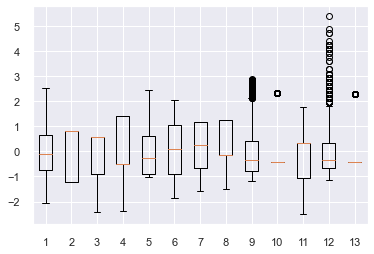

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status
0,0.446350,-1.224745,0.590048,1.401512,-1.010909,-0.891688,1.153254,1.236820,-0.108350,-0.426230,-2.493820,-0.164613,2.280906
1,1.322365,0.816497,-0.913194,-0.493817,-0.147150,-1.868426,-0.660853,-0.133282,-0.291719,2.346151,0.338096,0.488508,-0.438422
2,0.008343,0.816497,0.590048,-0.493817,-0.887515,-0.891688,0.246200,1.236820,-0.937654,-0.426230,0.338096,-1.144294,2.280906
3,-0.429664,-1.224745,-0.913194,-0.493817,-0.764121,1.061787,0.246200,-0.133282,-0.763634,-0.426230,0.338096,0.161947,-0.438422
4,-1.086676,0.816497,0.590048,-0.493817,-0.887515,-1.868426,-0.660853,-0.133282,-0.644858,-0.426230,0.338096,-0.817734,-0.438422


In [450]:
std_scaler =StandardScaler()
df_std_scaled=std_scaler.fit_transform(df)
plt.boxplot(df_std_scaled)
plt.show()

df_std_scaled =pd.DataFrame(std_scaler.fit_transform(df),columns=df.columns)
df_std_scaled.head()

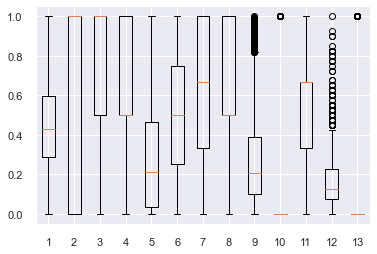

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status
0,0.547619,0.0,1.0,1.0,0.000000,0.25,1.000000,1.0,0.262454,0.0,0.000000,0.15,1.0
1,0.738095,1.0,0.5,0.5,0.250000,0.00,0.333333,0.5,0.217009,1.0,0.666667,0.25,0.0
2,0.452381,1.0,1.0,0.5,0.035714,0.25,0.666667,1.0,0.056925,0.0,0.666667,0.00,1.0
3,0.357143,0.0,0.5,0.5,0.071429,0.75,0.666667,0.5,0.100053,0.0,0.666667,0.20,0.0
4,0.214286,1.0,1.0,0.5,0.035714,0.00,0.333333,0.5,0.129489,0.0,0.666667,0.05,0.0


In [451]:
min_scaler =MinMaxScaler()
df_minmax_scaled=min_scaler.fit_transform(df)
plt.boxplot(df_minmax_scaled)
plt.show()

df_minmax_scaled =pd.DataFrame(df_minmax_scaled,columns=df.columns)
df_minmax_scaled.head()

### Dimensionality Reduction

In [452]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    #PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1) 
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance']) 
    cum_variance_ratios.index = dimensions
    
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [453]:
from sklearn.decomposition import PCA
pca = PCA(n_components=13).fit(df_std_scaled)
pca_samples= pca.transform(df_std_scaled)
pca_results=pca_results(df_std_scaled,pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status
PC 1,2.0387,0.1567,0.1567,0.5243,-0.0546,0.0229,0.0037,-0.0213,0.1998,0.0099,-0.1563,0.5755,-0.0135,0.0287,0.5014,-0.2703
PC 2,1.1856,0.0911,0.2479,0.0697,-0.2848,0.1503,0.4207,0.2258,0.1980,-0.2764,0.4951,0.1287,-0.0406,-0.0578,0.1106,0.5186
PC 3,1.0834,0.0833,0.3311,0.1075,0.2881,-0.2474,-0.2726,0.5675,0.1173,-0.1824,-0.2548,-0.0196,0.2444,-0.4566,0.0281,0.2578
PC 4,1.0659,0.0819,0.4131,-0.0732,0.1065,-0.5702,0.4333,0.2247,-0.0785,0.5626,0.1511,0.0441,0.1955,0.1404,0.1156,-0.0349
PC 5,1.0268,0.0789,0.4920,-0.0600,-0.3867,-0.0886,-0.0994,0.0651,-0.2719,-0.3472,-0.0631,0.0132,0.6930,0.3693,0.0685,-0.0699
PC 6,1.0099,0.0776,0.5696,0.0465,-0.3841,0.3078,-0.1176,-0.0415,-0.1447,0.4617,0.1879,-0.0077,0.3164,-0.5987,-0.0059,-0.1098
PC 7,0.9911,0.0762,0.6458,-0.1183,0.2055,0.1064,0.2696,-0.0564,-0.7832,-0.1539,-0.1665,0.1983,-0.1356,-0.2196,0.2571,0.1407
PC 8,0.9681,0.0744,0.7202,0.0802,0.5497,0.0026,-0.2561,-0.4470,0.0101,0.0113,0.4607,0.1072,0.3639,0.0334,0.1108,0.2371
PC 9,0.9426,0.0725,0.7927,0.0181,-0.3220,-0.6609,-0.0286,-0.4897,0.0320,-0.2474,0.0048,-0.0233,-0.1321,-0.3681,0.0205,0.0501
PC 10,0.8984,0.0691,0.8618,0.0158,0.1845,0.1751,0.6029,-0.2978,0.3042,-0.1007,-0.3961,-0.0760,0.3882,-0.1859,-0.1756,-0.0367


Cumulative Explained Variance>80% so use PC10

In [454]:
from sklearn.decomposition import PCA
pca= PCA(n_components=10)
pca.fit(df_std_scaled)
df_PCA =pd.DataFrame(pca.transform(df_std_scaled), columns=(['col1','col2','col3','col4','col5','col6',
                                                             'col7','col8','col9','col10']))
df_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1470.0,8.005690e-18,1.427825,-3.486416,-0.964963,-0.139824,0.711334,5.477364
col2,1470.0,-2.416812e-17,1.088835,-3.542641,-0.740700,-0.081976,0.659834,3.722209
col3,1470.0,9.418014e-17,1.040859,-2.634117,-0.747067,-0.099344,0.731994,4.350655
col4,1470.0,-3.776269e-19,1.032436,-2.489346,-0.716304,-0.008977,0.648942,3.310641
col5,1470.0,-8.694859e-18,1.013315,-2.347317,-0.680567,-0.124295,0.502758,3.473015
col6,1470.0,1.344352e-17,1.004944,-3.133932,-0.684292,-0.012268,0.663691,3.702115
col7,1470.0,1.040740e-16,0.995563,-2.847615,-0.717472,0.002756,0.674391,3.267404
col8,1470.0,-6.872809e-17,0.983905,-2.624441,-0.690576,0.016072,0.685720,3.079790
col9,1470.0,-3.413747e-17,0.970857,-2.741701,-0.661226,-0.052975,0.607023,3.568897
col10,1470.0,5.233909e-17,0.947822,-3.587300,-0.679724,-0.018123,0.626321,3.639672


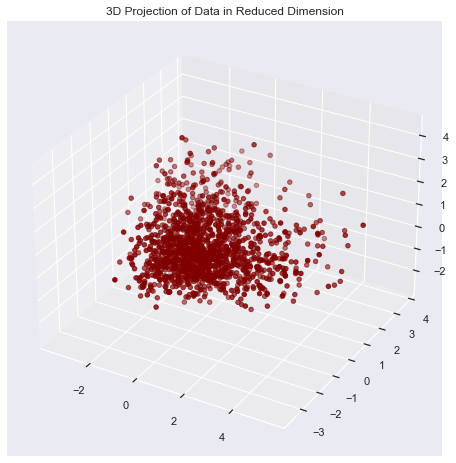

In [455]:
x= df_PCA['col1']
y= df_PCA['col2']
z= df_PCA['col3']

#To plot
fig =plt.figure(figsize=(10,8))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z, c="maroon", marker="o")
ax.set_title("3D Projection of Data in Reduced Dimension")
plt.show()

#### Elbow method / SSE Plot

In [456]:
# Clustering silhouette_score
# trying different number of clusters
for k in range(2, 11):
    model = KMeans(n_clusters=k).fit(df_PCA)
    label = model.labels_
    sil_coeff = silhouette_score(df_PCA, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k,sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.127
For n_clusters=3, The Silhouette Coefficient is 0.119
For n_clusters=4, The Silhouette Coefficient is 0.134
For n_clusters=5, The Silhouette Coefficient is 0.116
For n_clusters=6, The Silhouette Coefficient is 0.113
For n_clusters=7, The Silhouette Coefficient is 0.102
For n_clusters=8, The Silhouette Coefficient is 0.103
For n_clusters=9, The Silhouette Coefficient is 0.095
For n_clusters=10, The Silhouette Coefficient is 0.096


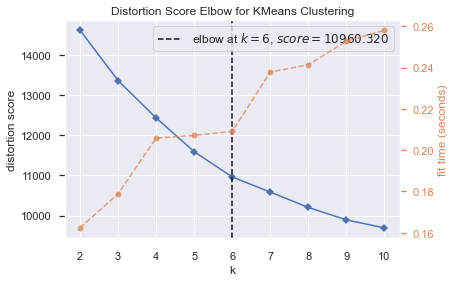

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [457]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find number of clusters to make
Elbow_M=KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(df_PCA)
Elbow_M.show()

Elbow only calculates the Euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc. The simplicity of elbow makes it more suited than silhouette score for datasets that are smaller in size.

The Elbow method does not work well if the data is not very clustered; in this case, you see a smooth curve and the value of k is unclear

Hence we are using silhouette score

#### Conclusion - From the above Elbow curve we will take the value of K=3 and rebuild the cluster.

In [458]:
model = KMeans(n_clusters=3).fit(df_PCA)
label = model.labels_
sil_coeff = silhouette_score(df_PCA, label, metric='euclidean')
print("For n_clusters={}, The KMeans Coefficient is {:.3f}".format(3,
sil_coeff))

For n_clusters=3, The KMeans Coefficient is 0.148


In [459]:
df.head()


,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status
0,41,0,2,2,1,2,4,2,5993,3,1,6,1
1,49,1,1,1,8,1,2,1,5130,4,3,10,0
2,37,1,2,1,2,2,3,2,2090,3,3,0,1
3,33,0,1,1,3,4,3,1,2909,3,3,8,0
4,27,1,2,1,2,1,2,1,3468,3,3,2,0


In [460]:
df.describe()

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.600000,1.607483,1.260544,9.192517,2.912925,2.728571,1.097279,6502.931293,3.153741,2.761224,7.008163,0.161224
std,9.135373,0.490065,0.665455,0.527792,8.106864,1.024165,1.102846,0.730121,4707.956783,0.360824,0.706476,6.126525,0.367863
min,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1009.000000,3.000000,1.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2911.000000,3.000000,2.000000,3.000000,0.000000
50%,36.000000,1.000000,2.000000,1.000000,7.000000,3.000000,3.000000,1.000000,4919.000000,3.000000,3.000000,5.000000,0.000000
75%,43.000000,1.000000,2.000000,2.000000,14.000000,4.000000,4.000000,2.000000,8379.000000,3.000000,3.000000,9.000000,0.000000
max,60.000000,1.000000,2.000000,2.000000,29.000000,5.000000,4.000000,2.000000,19999.000000,4.000000,4.000000,40.000000,1.000000


Conclusion - From the above we can see that the data has been clustered into 3 different parts.

Conclusion - Employees in label 0 are having high Salary and are older

### Model improvement

In [462]:
df_scaled = df[["Age","Distance","Salary","Service Length"]]

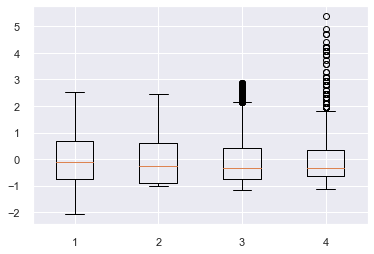

,Age,Distance,Salary,Service Length
0,0.446350,-1.010909,-0.108350,-0.164613
1,1.322365,-0.147150,-0.291719,0.488508
2,0.008343,-0.887515,-0.937654,-1.144294
3,-0.429664,-0.764121,-0.763634,0.161947
4,-1.086676,-0.887515,-0.644858,-0.817734


In [463]:
# Class instance
std_scaler =StandardScaler()
df_std_scaled2=std_scaler.fit_transform(df_scaled)
plt.boxplot(df_std_scaled2)
plt.show()

df_std_scaled2 = pd.DataFrame(df_std_scaled2)
df_std_scaled2.columns = ["Age","Distance","Salary","Service Length"]
df_std_scaled2.head()

In [464]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    #PCA cumulative variance explained
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1) 
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance']) 
    cum_variance_ratios.index = dimensions
    
    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [465]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4).fit(df_std_scaled2)
pca_samples= pca.transform(df_std_scaled2)
pca_results=pca_results(df_std_scaled2,pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,Age,Distance,Salary,Service Length
PC 1,1.8895,0.4720,0.4720,0.5462,-0.0071,0.6276,0.5548
PC 2,1.0013,0.2502,0.7222,-0.0010,0.9993,-0.0179,0.0340
PC 3,0.6892,0.1722,0.8944,0.7256,0.0236,-0.0238,-0.6873
PC 4,0.4227,0.1056,1.0000,0.4185,-0.0294,-0.7780,0.4677


Cumulative Explained Variance>80% so use PC3

In [466]:
from sklearn.decomposition import PCA
pca= PCA(n_components=3)
pca.fit(df_std_scaled2)
df2_PCA =pd.DataFrame(pca.transform(df_std_scaled2), columns=(['col1','col2','col3']))
df2_PCA.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,1470.0,-5.037543e-17,1.374573,-2.489990,-0.950377,-0.246470,0.579943,5.437067
col2,1470.0,5.796573e-18,1.000655,-1.089261,-0.872567,-0.270208,0.594027,2.521075
col3,1470.0,1.925897e-18,0.830210,-2.006624,-0.639760,-0.088973,0.536550,2.461787


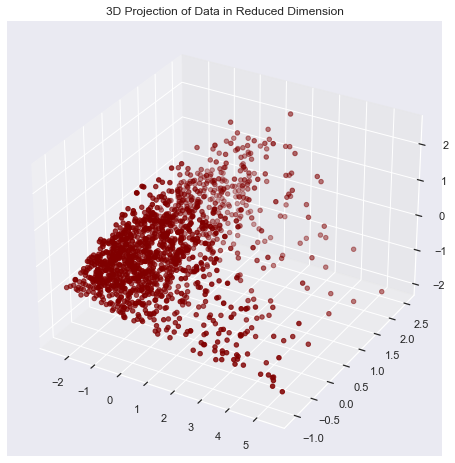

In [467]:
x= df2_PCA['col1']
y= df2_PCA['col2']
z= df2_PCA['col3']

#To plot
fig =plt.figure(figsize=(10,8))
ax =fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z, c="maroon", marker="o")
ax.set_title("3D Projection of Data in Reduced Dimension")
plt.show()

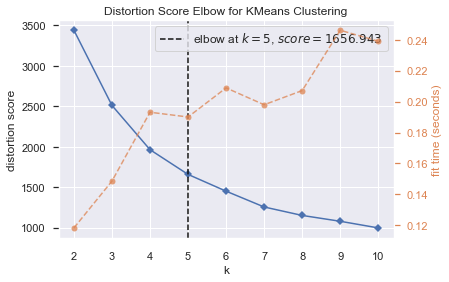

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [468]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find number of clusters to make
Elbow_M=KElbowVisualizer(KMeans(),k=10)
Elbow_M.fit(df2_PCA)
Elbow_M.show()

In [473]:
# Clustering silhouette_score
# trying different number of clusters
for k in range(2, 11):
    model = KMeans(n_clusters=k).fit(df2_PCA)
    label = model.labels_
    sil_coeff = silhouette_score(df2_PCA, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k,sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.397
For n_clusters=3, The Silhouette Coefficient is 0.361
For n_clusters=4, The Silhouette Coefficient is 0.363
For n_clusters=5, The Silhouette Coefficient is 0.305
For n_clusters=6, The Silhouette Coefficient is 0.311
For n_clusters=7, The Silhouette Coefficient is 0.324
For n_clusters=8, The Silhouette Coefficient is 0.318
For n_clusters=9, The Silhouette Coefficient is 0.309
For n_clusters=10, The Silhouette Coefficient is 0.285


Silhouette Coefficient k=1 not chosen because age and length of service related,  k=4 is chosen since it has the highest value


In [519]:
model = KMeans(n_clusters=4).fit(df2_PCA)
label = model.labels_
sil_coeff = silhouette_score(df2_PCA, label, metric='euclidean')
print("For n_clusters={}, The KMeans Coefficient is {:.3f}".format(3,sil_coeff))

For n_clusters=3, The KMeans Coefficient is 0.363


In [475]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df2_PCA)

KMeans(max_iter=50, n_clusters=4)

In [476]:
kmeans.labels_

array([0, 1, 0, ..., 0, 1, 0])

In [477]:
df["Label"] = kmeans.labels_

In [478]:
df

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status,Label
0,41,0,2,2,1,2,4,2,5993,3,1,6,1,0
1,49,1,1,1,8,1,2,1,5130,4,3,10,0,1
2,37,1,2,1,2,2,3,2,2090,3,3,0,1,0
3,33,0,1,1,3,4,3,1,2909,3,3,8,0,0
4,27,1,2,1,2,1,2,1,3468,3,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,1,23,2,4,1,2571,3,3,5,0,3
1466,39,1,2,1,6,1,1,1,9991,3,3,7,0,1
1467,27,1,2,1,4,3,2,1,6142,4,3,6,0,0
1468,49,1,1,2,2,3,2,1,5390,3,2,9,0,1


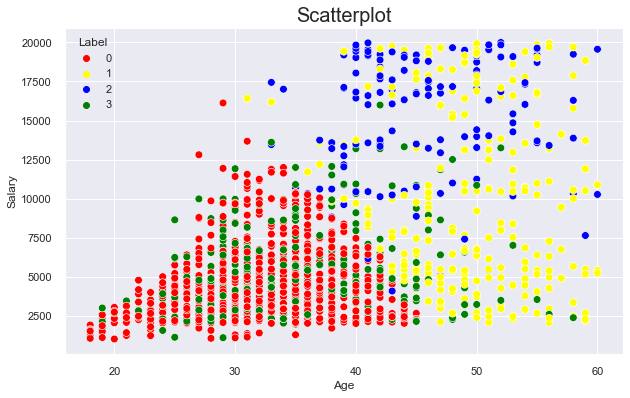

In [479]:
# ScatterPlot when K=3

plt.figure(figsize=(10,6))

plt.title("Scatterplot", fontsize=20)
sns.scatterplot(data=df, x="Age", y="Salary", hue="Label", s=60, palette=['red','yellow','blue','green'])
plt.show()


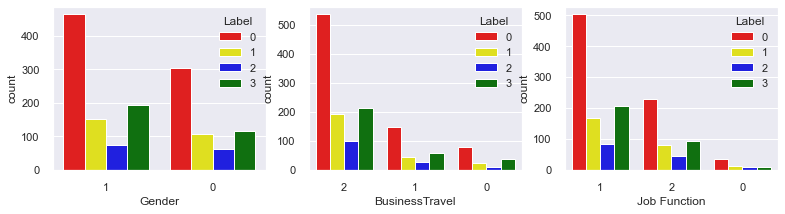

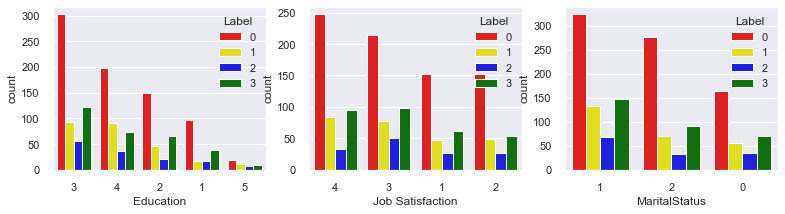

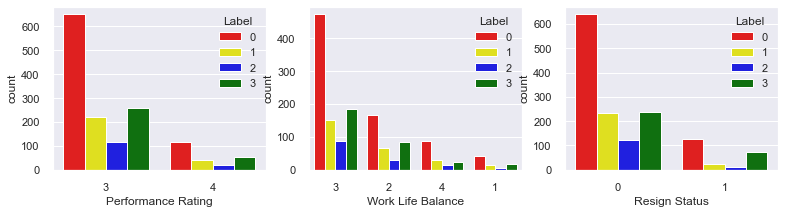

In [480]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(13, 3))

sns.countplot(x=df['Gender'],order=df['Gender'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[0])
sns.countplot(x=df['BusinessTravel'],order=df['BusinessTravel'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[1])
sns.countplot(x=df['Job Function'],order=df['Job Function'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[2])

fig, axs = plt.subplots(1, 3, figsize=(13, 3))
sns.countplot(x=df['Education'],order=df['Education'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[0])
sns.countplot(x=df['Job Satisfaction'],order=df['Job Satisfaction'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[1])
sns.countplot(x=df['MaritalStatus'],order=df['MaritalStatus'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[2])

fig, axs = plt.subplots(1, 3, figsize=(13, 3))
sns.countplot(x=df['Performance Rating'],order=df['Performance Rating'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[0])
sns.countplot(x=df['Work Life Balance'],order=df['Work Life Balance'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[1])
sns.countplot(x=df['Resign Status'],order=df['Resign Status'].value_counts().index,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[2])
plt.show()

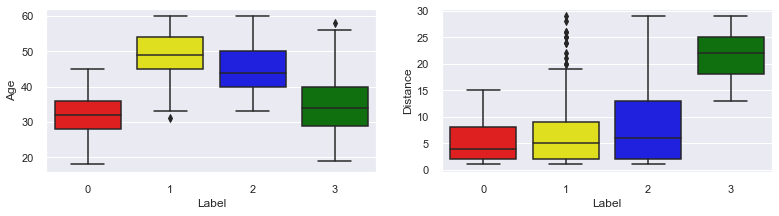

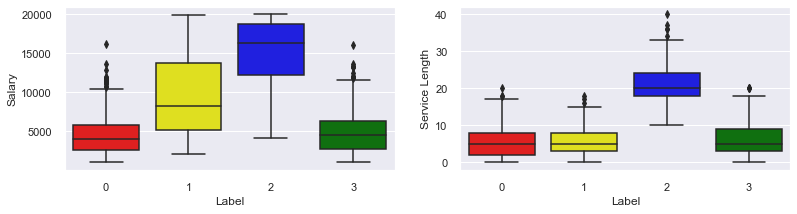

In [481]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))

sns.boxplot(data=df, x="Label", y="Age", palette=['red','yellow','blue','green'], ax=axs[0])
sns.boxplot(data=df, x="Label", y="Distance", palette=['red','yellow','blue','green'], ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
sns.boxplot(data=df, x="Label", y="Salary", palette=['red','yellow','blue','green'], ax=axs[0])
sns.boxplot(data=df, x="Label", y="Service Length", palette=['red','yellow','blue','green'], ax=axs[1])

plt.show()

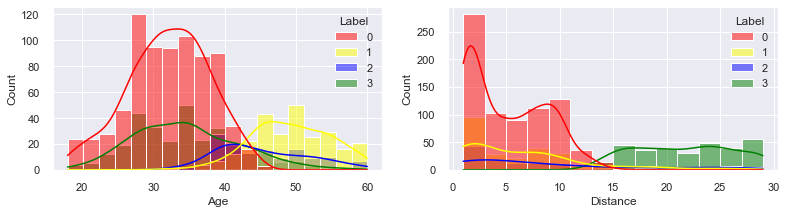

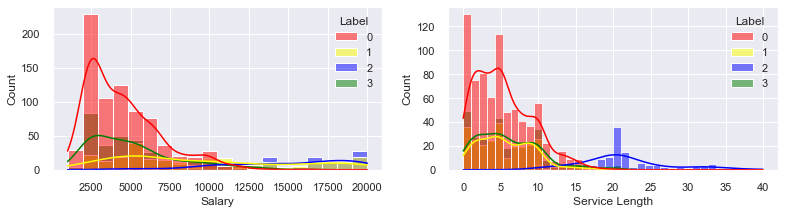

In [482]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))

sns.histplot(data=df, x="Age", kde=True,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[0])
sns.histplot(data=df, x="Distance", kde=True,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
sns.histplot(data=df, x="Salary", kde=True,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[0])
sns.histplot(data=df, x="Service Length", kde=True,hue=df['Label'],palette=['red','yellow','blue','green'], ax=axs[1])

plt.show()

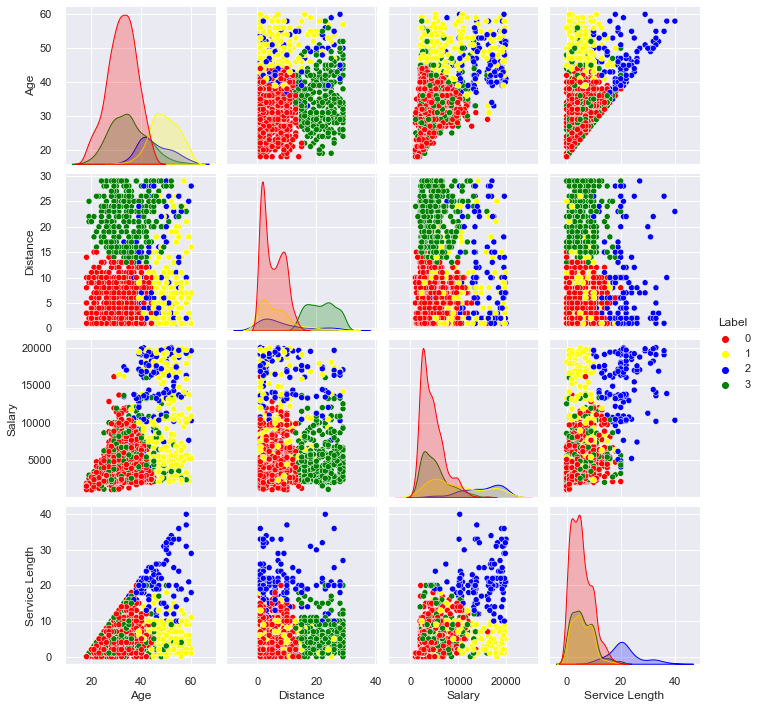

In [512]:
sns.set_style("darkgrid")
edited_df=df[['Age','Distance','Salary','Service Length','Label']]
sns.pairplot(edited_df,hue='Label', palette=['red','yellow','blue','green'])
plt.show()

## Agglomerative Clustering

## Elbow Method

In [20]:
pip install -U yellowbrick

Note: you may need to restart the kernel to use updated packages.


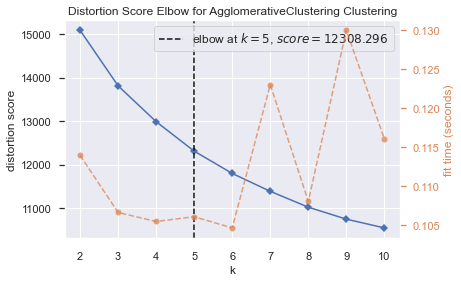

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [484]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find number of clusters to make
Elbow_M=KElbowVisualizer(AgglomerativeClustering(),k=10)
Elbow_M.fit(df_PCA)
Elbow_M.show()

In [483]:
# Clustering silhouette_score
# trying different number of clusters
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k).fit(df_PCA)
    label = model.labels_
    sil_coeff = silhouette_score(df_PCA, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k,sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.174
For n_clusters=3, The Silhouette Coefficient is 0.151
For n_clusters=4, The Silhouette Coefficient is 0.105
For n_clusters=5, The Silhouette Coefficient is 0.098
For n_clusters=6, The Silhouette Coefficient is 0.077
For n_clusters=7, The Silhouette Coefficient is 0.065
For n_clusters=8, The Silhouette Coefficient is 0.066
For n_clusters=9, The Silhouette Coefficient is 0.066
For n_clusters=10, The Silhouette Coefficient is 0.071


Elbow only calculates the Euclidean distance whereas silhouette takes into account variables such as variance, skewness, high-low differences, etc. The simplicity of elbow makes it more suited than silhouette score for datasets that are smaller in size.

The Elbow method does not work well if the data is not very clustered; in this case, you see a smooth curve and the value of k is unclear

Hence we are using silhouette score

In [494]:
# Clustering silhouette_score
# trying different number of clusters
for k in range(2, 11):
    model = AgglomerativeClustering(n_clusters=k).fit(df2_PCA)
    label = model.labels_
    sil_coeff = silhouette_score(df2_PCA, label, metric='euclidean')
    print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(k,sil_coeff))


For n_clusters=2, The Silhouette Coefficient is 0.389
For n_clusters=3, The Silhouette Coefficient is 0.330
For n_clusters=4, The Silhouette Coefficient is 0.337
For n_clusters=5, The Silhouette Coefficient is 0.253
For n_clusters=6, The Silhouette Coefficient is 0.263
For n_clusters=7, The Silhouette Coefficient is 0.253
For n_clusters=8, The Silhouette Coefficient is 0.253
For n_clusters=9, The Silhouette Coefficient is 0.247
For n_clusters=10, The Silhouette Coefficient is 0.251


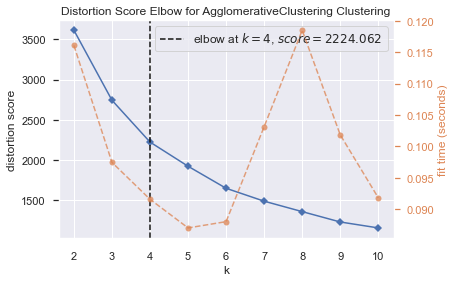

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [495]:
from yellowbrick.cluster import KElbowVisualizer
# Quick examination of elbow method to find number of clusters to make
Elbow_M=KElbowVisualizer(AgglomerativeClustering(),k=10)
Elbow_M.fit(df2_PCA)
Elbow_M.show()

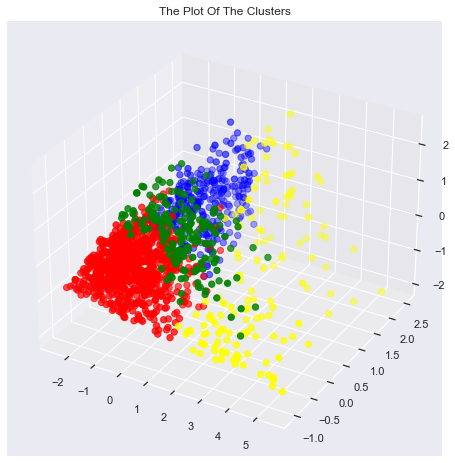

In [496]:
import matplotlib.colors as colors
from sklearn.cluster import AgglomerativeClustering
cmap = colors.ListedColormap(['red','yellow','blue','green'])

## Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)

## Fit model and predict clusters
yhat_AC = AC.fit_predict(df2_PCA)

## Adding the Clusters feature to the orignal dataframe.
df["Cluster"]= yhat_AC

#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")

ax.scatter(x, y, z, s=40, c=df["Cluster"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")

plt.show()

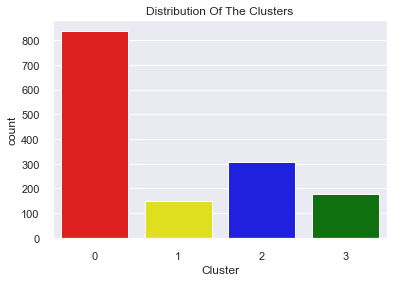

In [498]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Cluster"], palette= ['red','yellow','blue','green'])
pl.set_title("Distribution Of The Clusters")
plt.show()

### The clusters are not fairly distributed.

In [499]:
model = AgglomerativeClustering(n_clusters=4).fit(df2_PCA)
label = model.labels_
sil_coeff = silhouette_score(df2_PCA, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {:.3f}".format(3,sil_coeff))


For n_clusters=3, The Silhouette Coefficient is 0.337


In [500]:
df

,Age,Gender,BusinessTravel,Job Function,Distance,Education,Job Satisfaction,MaritalStatus,Salary,Performance Rating,Work Life Balance,Service Length,Resign Status,Label,Cluster
0,41,0,2,2,1,2,4,2,5993,3,1,6,1,0,0
1,49,1,1,1,8,1,2,1,5130,4,3,10,0,1,3
2,37,1,2,1,2,2,3,2,2090,3,3,0,1,0,0
3,33,0,1,1,3,4,3,1,2909,3,3,8,0,0,0
4,27,1,2,1,2,1,2,1,3468,3,3,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,1,1,1,23,2,4,1,2571,3,3,5,0,3,2
1466,39,1,2,1,6,1,1,1,9991,3,3,7,0,1,0
1467,27,1,2,1,4,3,2,1,6142,4,3,6,0,0,0
1468,49,1,1,2,2,3,2,1,5390,3,2,9,0,1,0


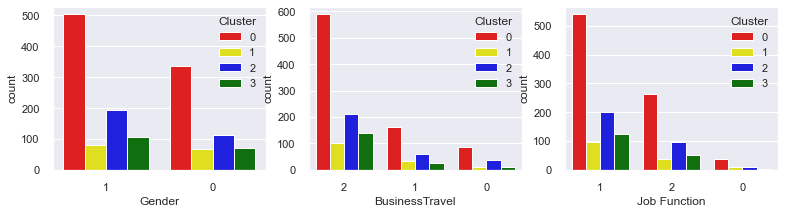

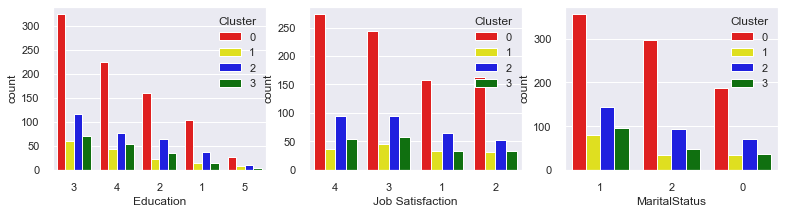

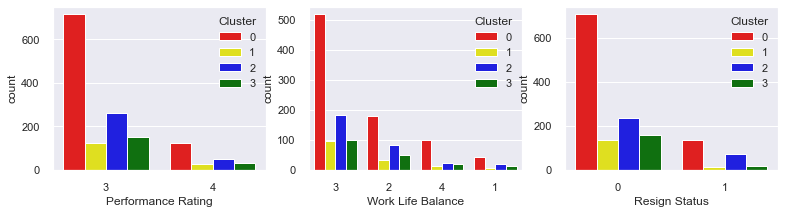

In [509]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 3, figsize=(13, 3))

sns.countplot(x=df['Gender'],order=df['Gender'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[0])
sns.countplot(x=df['BusinessTravel'],order=df['BusinessTravel'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[1])
sns.countplot(x=df['Job Function'],order=df['Job Function'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[2])

fig, axs = plt.subplots(1, 3, figsize=(13, 3))
sns.countplot(x=df['Education'],order=df['Education'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[0])
sns.countplot(x=df['Job Satisfaction'],order=df['Job Satisfaction'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[1])
sns.countplot(x=df['MaritalStatus'],order=df['MaritalStatus'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[2])

fig, axs = plt.subplots(1, 3, figsize=(13, 3))
sns.countplot(x=df['Performance Rating'],order=df['Performance Rating'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[0])
sns.countplot(x=df['Work Life Balance'],order=df['Work Life Balance'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[1])
sns.countplot(x=df['Resign Status'],order=df['Resign Status'].value_counts().index,hue=df['Cluster'],palette=['red','yellow','blue','green'], ax=axs[2])
plt.show()

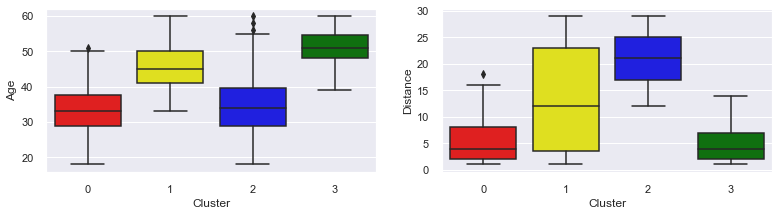

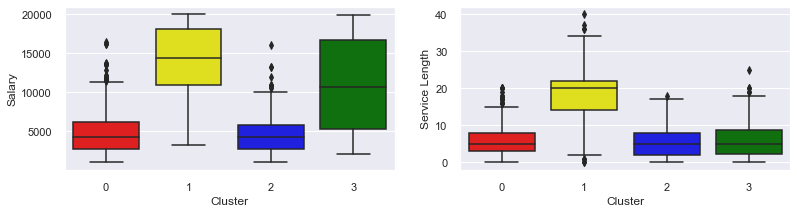

In [510]:
# background style 
sns.set(style="darkgrid")

fig, axs = plt.subplots(1, 2, figsize=(13, 3))

sns.boxplot(data=df, x="Cluster", y="Age", palette=['red','yellow','blue','green'], ax=axs[0])
sns.boxplot(data=df, x="Cluster", y="Distance", palette=['red','yellow','blue','green'], ax=axs[1])

fig, axs = plt.subplots(1, 2, figsize=(13, 3))
sns.boxplot(data=df, x="Cluster", y="Salary", palette=['red','yellow','blue','green'], ax=axs[0])
sns.boxplot(data=df, x="Cluster", y="Service Length", palette=['red','yellow','blue','green'], ax=axs[1])

plt.show()

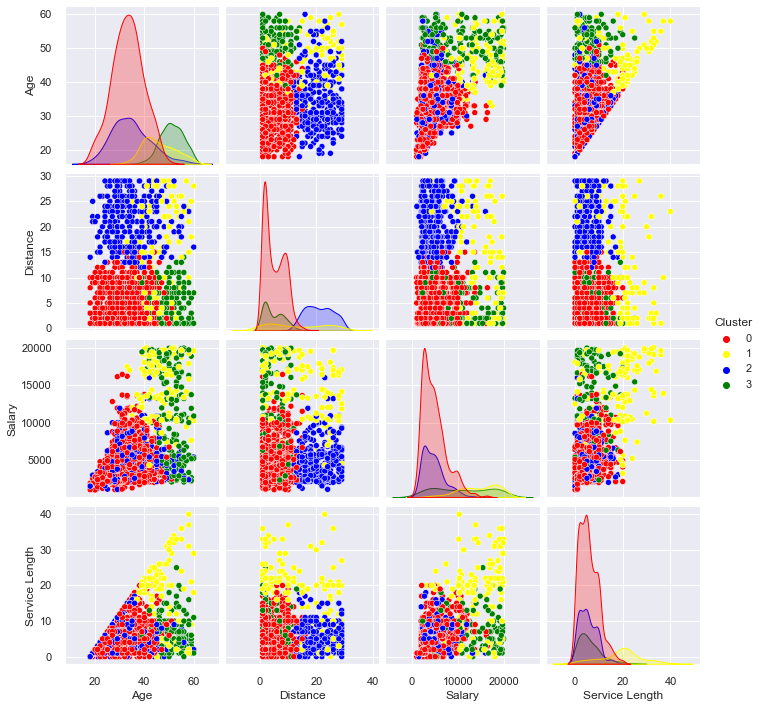

In [511]:
sns.set_style("darkgrid")
edited_df=df[['Age','Distance','Salary','Service Length','Cluster']]
sns.pairplot(edited_df,hue='Cluster', palette=['red','yellow','blue','green'])
plt.show()

### Use lower The Silhouette Coefficient score

## Conclusion
Red cluster consists of younger employees (lower age and service length) and they have lower salary
Red cluster rarely travel and working in R&D
This group of employees are more likely to resign
Management should provide higher salary, prepare more condusive environment for them especially those who work in R&D department.